# Bike Sharing - Case Study

# Data Sourcing

**Peforming required python library imports**

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)
import warnings
warnings.filterwarnings('ignore')

**Loading Source Data into Pandas Dataframe**

In [249]:
bike_data = pd.read_csv('day.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**Total Columns and Rows**

In [250]:
total_columns = (bike_data.shape)[1]
total_rows = (bike_data.shape)[0]
print(f'Total Columns : {total_columns}')
print(f'Total Rows : {total_rows}')

Total Columns : 16
Total Rows : 730


**Checking Table Statistics and Viewing the Table Schema**

In [251]:
print(f'Pandas Dataframe (load_master) Statistics and Schema : \n ')
print(f'Shape : \n\n {bike_data.shape} \n')
print(f'Schema : \n\n  {bike_data.dtypes} \n')

Pandas Dataframe (load_master) Statistics and Schema : 
 
Shape : 

 (730, 16) 

Schema : 

  instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object 



# Data Cleaning

**Checking for empty rows**

In [252]:
bike_data.isnull().all(axis=1).sum()

0

**Checking nulls for each column**

In [253]:
bike_data_nulls = bike_data.isnull().sum()
print(bike_data_nulls)


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Creating a list of column names who have nulls for all its rows**

In [254]:
null_counts_df = pd.DataFrame({'Column_Name': bike_data_nulls.index, 'Null_Count': bike_data_nulls.values})
null_counts_df = null_counts_df[(null_counts_df.Null_Count == total_rows)]
bike_data_nulls_list = list(null_counts_df.Column_Name.values)
bike_data_nulls_list

[]

**Performing preferred column renames**

In [255]:
bike_data.rename(columns = {'weathersit':'weather','hum':'humidity','yr':'year','mnth':'month','cnt':'count'}, inplace=True)
bike_data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Exploratory Data Analysis

**Removing unnecessary columns for Analysis**

In [256]:
# filter_cols = ['season','weather','year','month','holiday','weekday','workingday','temp','atemp','humidity','windspeed','count']
# bike_exp = bike_data[filter_cols]
bike_exp = bike_data.drop(['instant','dteday','casual','registered'], axis=1)
bike_exp.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


**Analysis Using Categorical Type Variable**

**Handling Categorical Variable 'Season'**

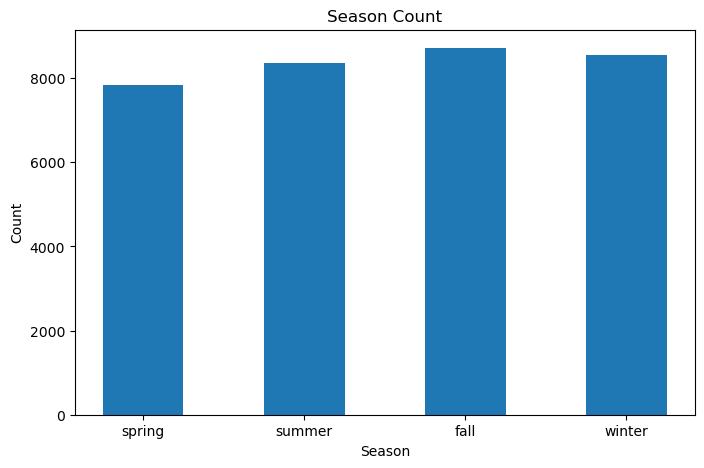

In [257]:
bike_exp.season = bike_exp.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})
plt.figure(figsize=[8,5])
plt.bar(bike_exp['season'],bike_exp['count'], width=0.5)
plt.title('Season Count')
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()

**Analysis Using Categorical Type Variable**

**Handling Categorical Variable 'Month'**

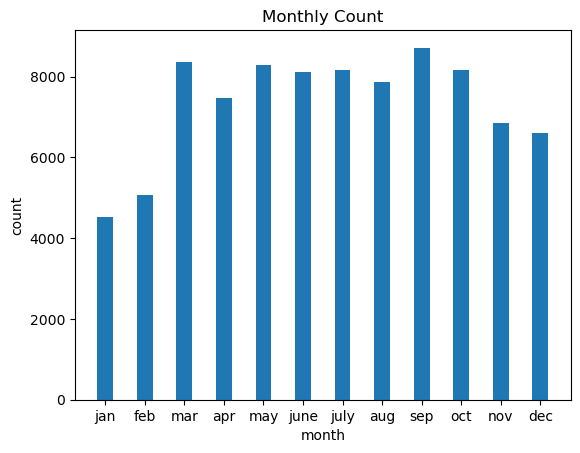

In [258]:
bike_exp.month = bike_exp.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
plt.bar(bike_exp['month'],bike_exp['count'], width=0.4)
plt.xlabel('month')
plt.ylabel('count')
plt.title('Monthly Count')
plt.show()

**Analysis Using Categorical Type Variable**

**Handling Categorical Variable 'Weekday'**

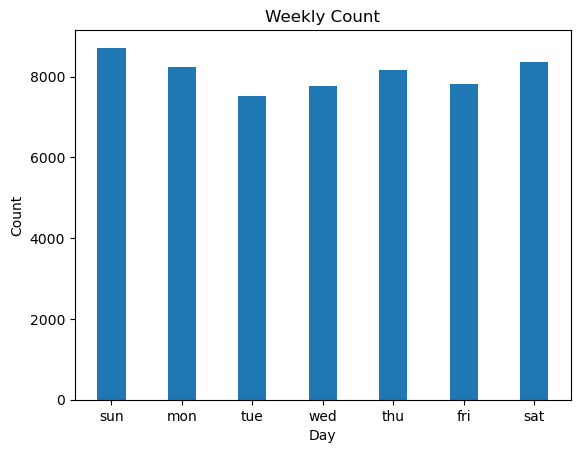

In [259]:
bike_exp.weekday = bike_exp.weekday.map({0:'mon',1:'tue',2:'wed',3:'thu',4:'fri',5:'sat',6:'sun'})
plt.bar(bike_exp['weekday'],bike_exp['count'], width=0.4)
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Weekly Count')
plt.show()

**Analysis Using Binary Type Variable**

**Handling Binary Variable 'WorkingDay'**

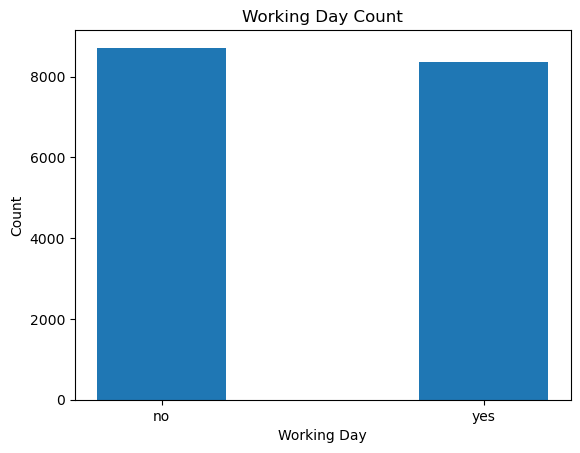

In [260]:
bike_test = bike_exp.copy(deep=True)
bike_test.workingday = bike_test.workingday.map({0:'no',1:'yes'})

plt.bar(bike_test['workingday'],bike_test['count'], width=0.4)

plt.xlabel('Working Day')
plt.ylabel('Count')
plt.title('Working Day Count')
plt.show()

**Analysis Using Binary Type Variable**


**Handling Binary Variable 'Year'**

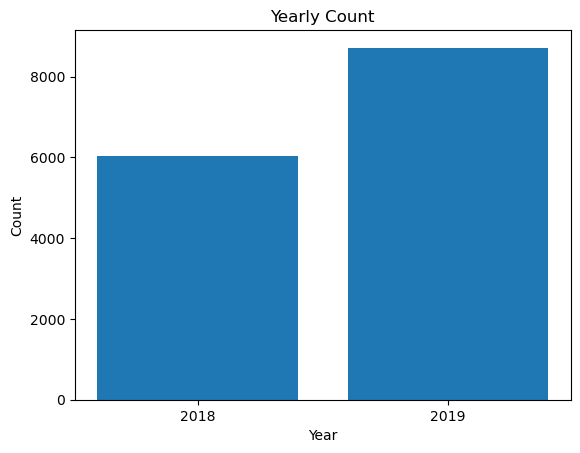

In [261]:
bike_test = bike_exp.copy(deep=True)
bike_test.year = bike_test.year.map({0:'2018',1:'2019'})
plt.bar(bike_test['year'],bike_test['count'],width=0.8)
plt.title('Yearly Count')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

**Analysis Using Binary Type Variable**

**Handling Categorical Variable 'Weather'**

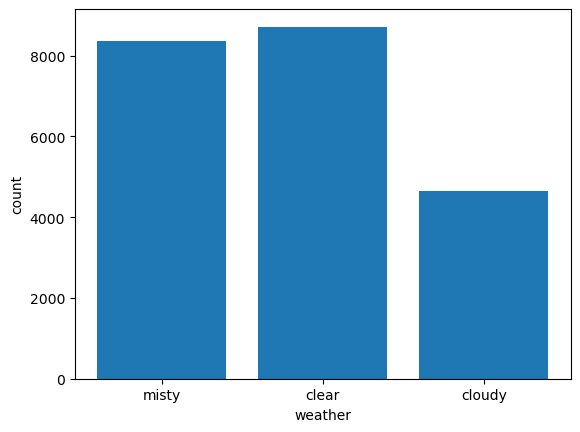

In [262]:
bike_exp.weather = bike_exp.weather.map({1:'clear', 2:'misty', 3:'cloudy'})
plt.bar(bike_exp['weather'],bike_exp['count'],width=0.8)
plt.xlabel('weather')
plt.ylabel('count')
plt.show()

**Analysis Using Binary Type Variable**

**Handling Binary Variable 'Holiday'**

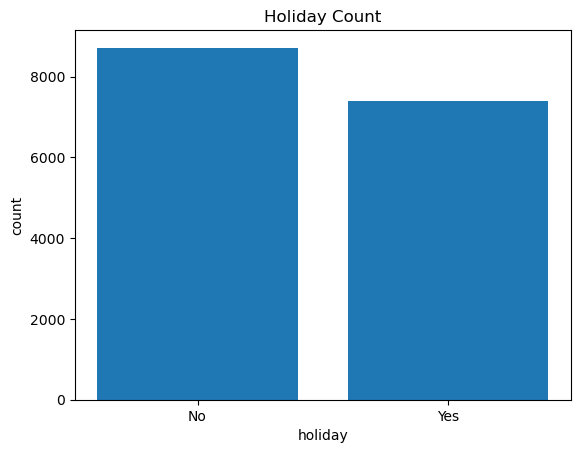

In [263]:
bike_test = bike_exp.copy(deep=True)
bike_test.holiday = bike_test.holiday.map({0:'No',1:'Yes'})
plt.bar(bike_test['holiday'],bike_test['count'],width=0.8)
plt.xlabel('holiday')
plt.ylabel('count')
plt.title('Holiday Count')
plt.show()

**Analysis Using Numerical Type Variable on Pairplot**

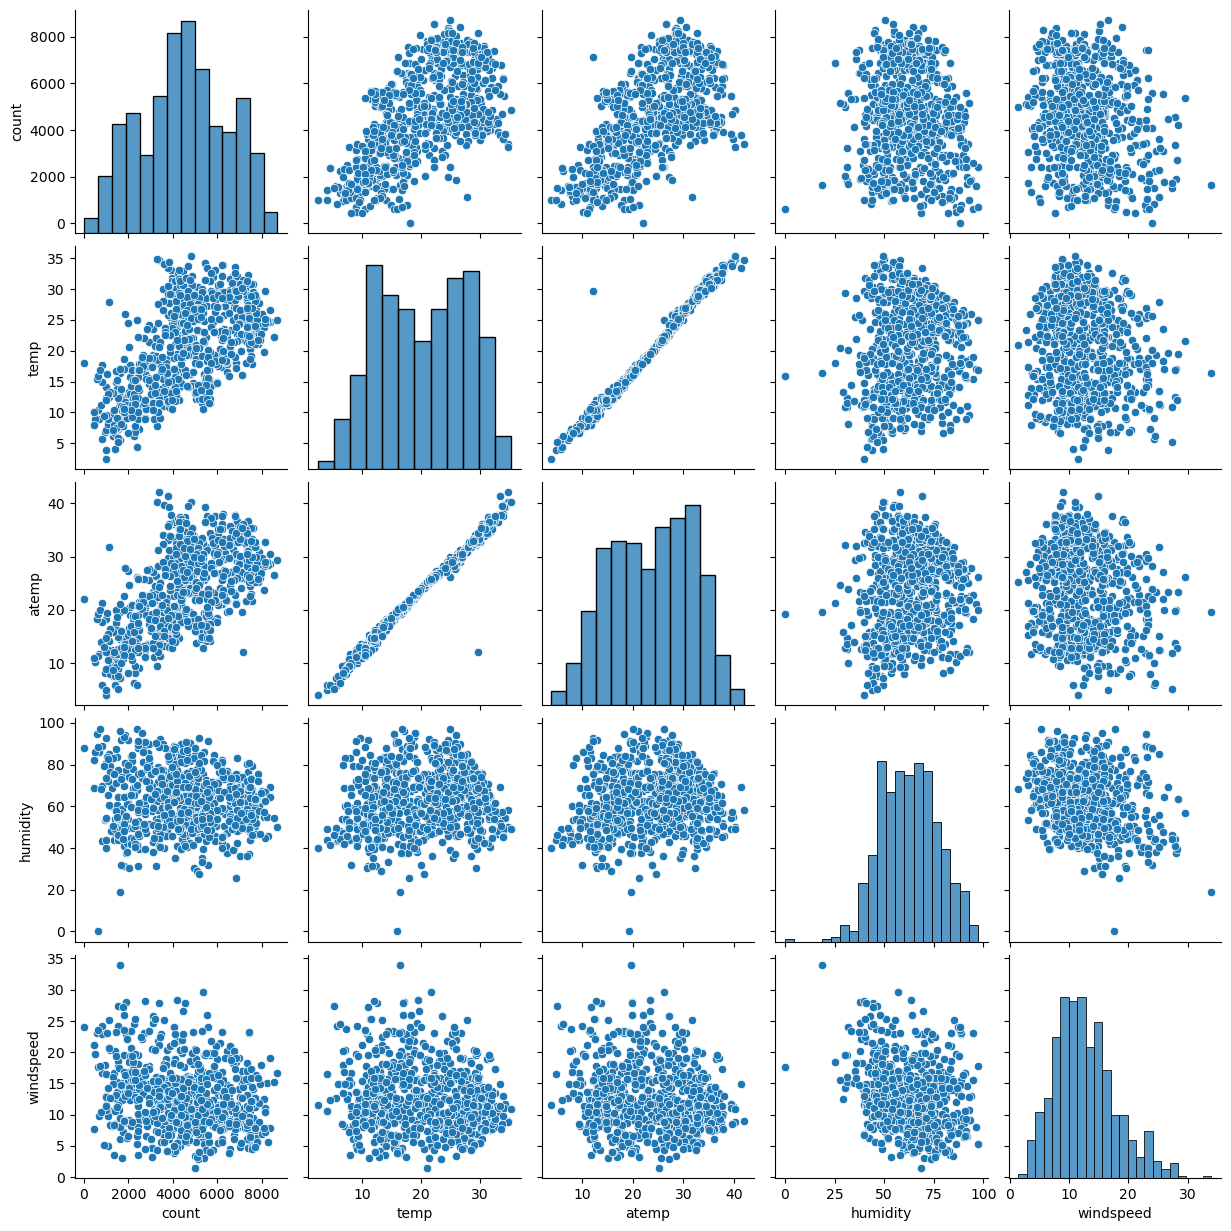

In [264]:
sns.pairplot(bike_exp[["count","temp","atemp","humidity","windspeed"]])
plt.show()

# Data Preparation

**Preparing Dummy Varibles for 'Season'**

In [265]:
season = pd.get_dummies(bike_exp.season, drop_first=True)
season.describe()

,spring,summer,winter
count,730.000000,730.000000,730.000000
mean,0.246575,0.252055,0.243836
std,0.431313,0.434490,0.429689
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


In [266]:
bike_exp = pd.concat([bike_exp,season],axis=1)

**Preparing Dummy Variables for 'Month'**

In [267]:
month = pd.get_dummies(bike_exp.month, drop_first=True)
month.describe()

,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.084932,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192
std,0.278971,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,0.278971,0.274845,0.278971,0.274845
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [268]:
bike_exp = pd.concat([bike_exp,month],axis=1)

**Preparing Dummy Variables for 'Weekday'**

In [269]:
weekday = pd.get_dummies(bike_exp.weekday, drop_first=True)
weekday.describe()

,mon,sat,sun,thu,tue,wed
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.143836,0.142466,0.143836,0.141096,0.143836,0.142466
std,0.351164,0.349767,0.351164,0.348359,0.351164,0.349767
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [270]:
bike_exp = pd.concat([bike_exp,weekday],axis=1)

**Preparing Dummy Variables for 'Weather'**

In [271]:
weather = pd.get_dummies(bike_exp.weather, drop_first=True)
weather.describe()

,cloudy,misty
count,730.000000,730.000000
mean,0.028767,0.336986
std,0.167266,0.473004
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [272]:
bike_exp = pd.concat([bike_exp,weather],axis=1)

In [273]:
bike_exp = bike_exp.drop(['weather','weekday','season','workingday','month','atemp'], axis=1)

In [274]:
bike_exp.head()

,year,holiday,temp,humidity,windspeed,count,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,cloudy,misty
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,0,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


**Spliting Data into Train and Test**

In [275]:
from sklearn.model_selection import train_test_split

In [276]:
bike_exp_train, bike_exp_test = train_test_split(bike_exp,train_size=0.7, random_state=100)

In [277]:
bike_exp_train.shape

(510, 28)

In [278]:
bike_exp_test.shape

(220, 28)

**Rescaling the Data**

In [279]:
from sklearn.preprocessing import MinMaxScaler

In [280]:
scaler = MinMaxScaler()
num_vars = ['temp','humidity','windspeed','count']
bike_exp_train[num_vars] = scaler.fit_transform(bike_exp_train[num_vars])
bike_exp_train.head()

,year,holiday,temp,humidity,windspeed,count,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,cloudy,misty
576,1,0,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
111,0,0,0.345824,0.751824,0.380981,0.191095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [281]:
bike_exp_train[num_vars].describe()

,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


# Model Train

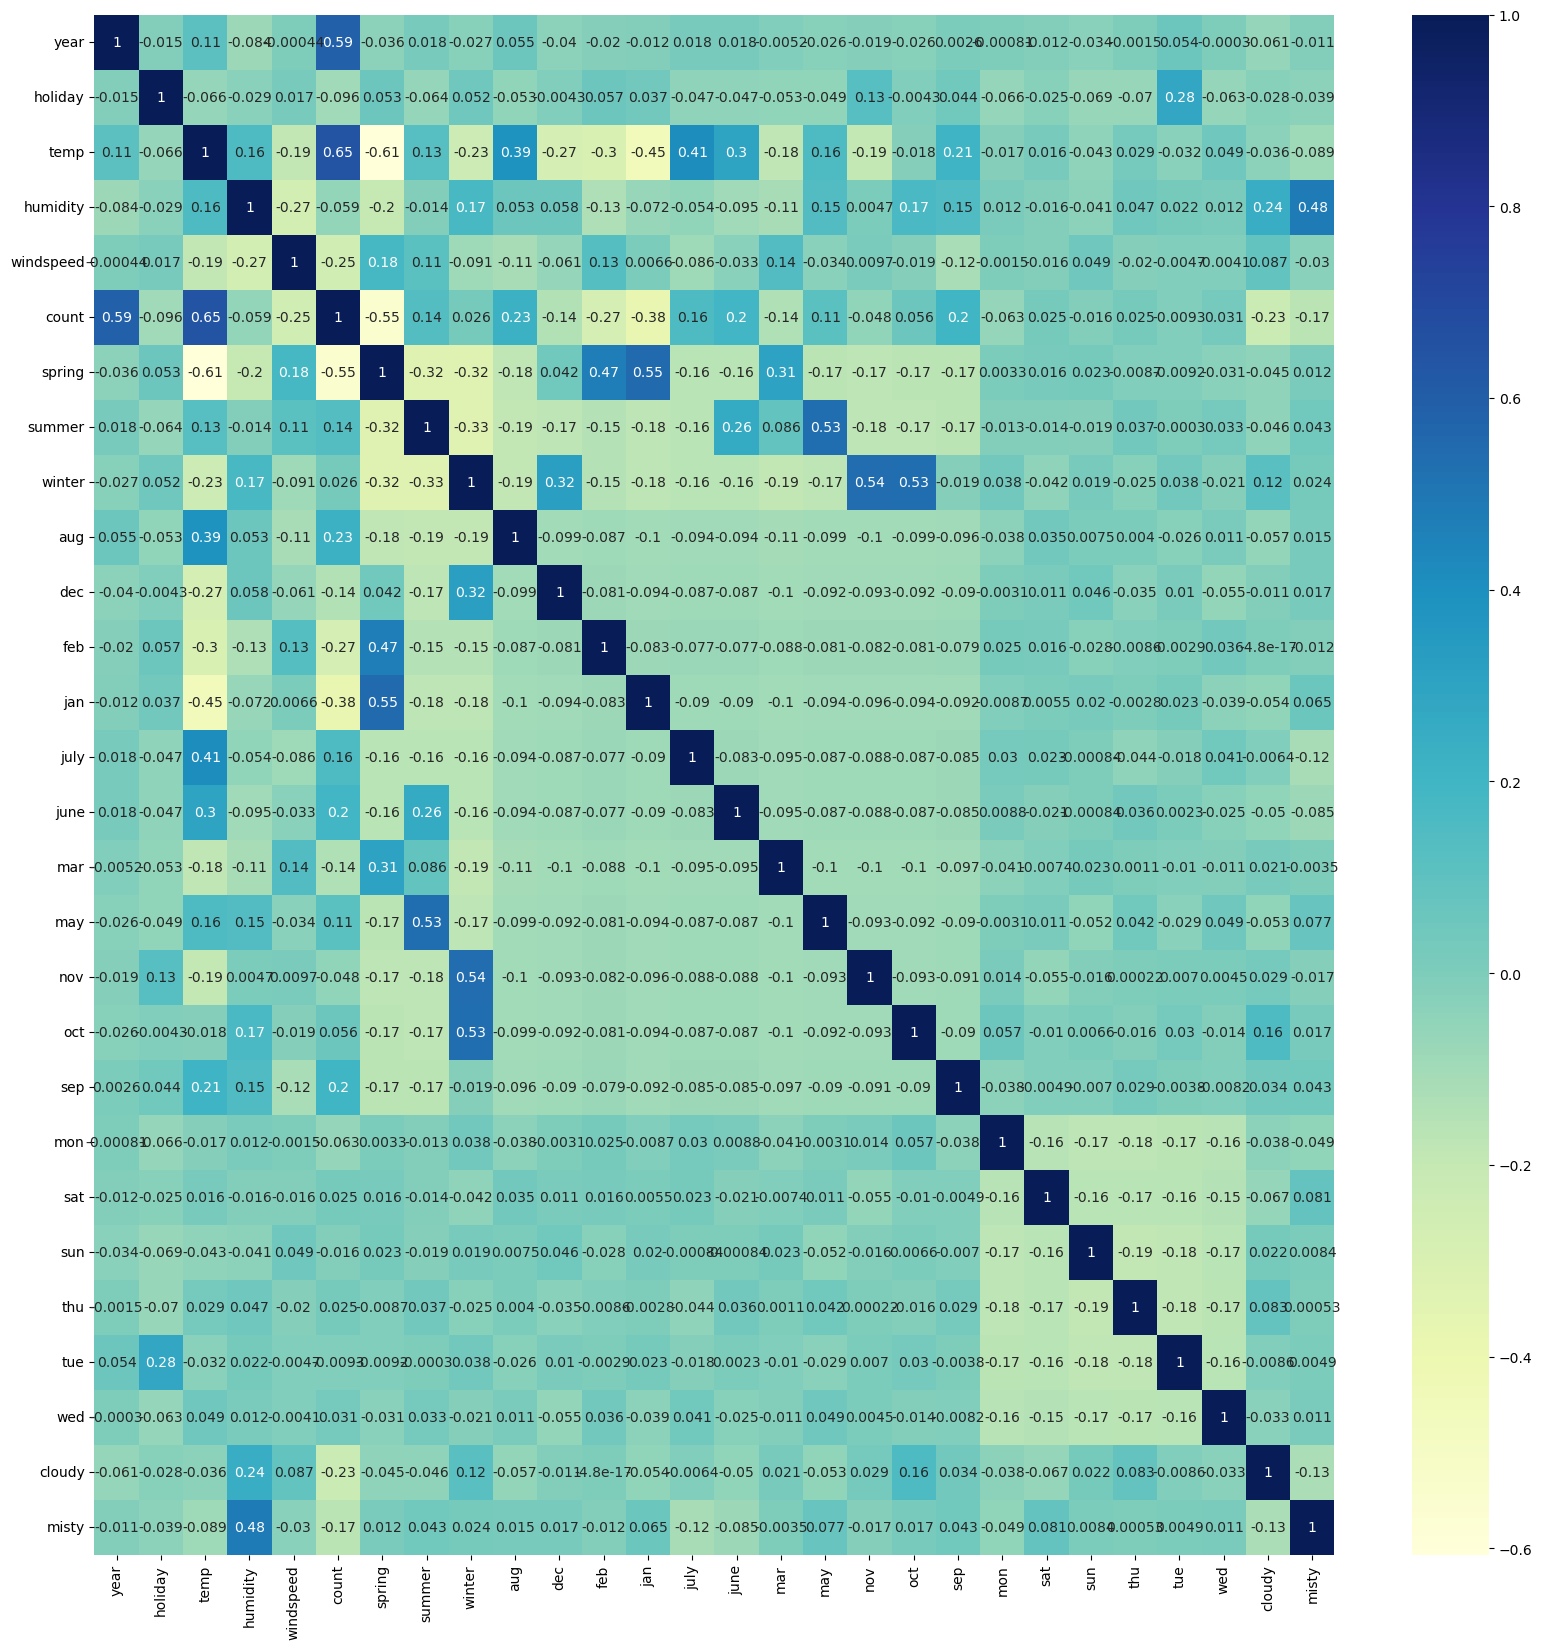

In [282]:
plt.figure(figsize=(20,20))
sns.heatmap(bike_exp_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [283]:
y_train = bike_exp_train.pop('count')
X_train = bike_exp_train


In [284]:
X_train.head()

,year,holiday,temp,humidity,windspeed,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,cloudy,misty
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
111,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [285]:
X_train.describe()

,year,holiday,temp,humidity,windspeed,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thu,tue,wed,cloudy,misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.537440,0.650480,0.320883,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373,0.029412,0.345098
std,0.500429,0.157763,0.225858,0.145846,0.169803,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.538643,0.199179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.542596,0.653714,0.296763,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.735215,0.754830,0.414447,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [286]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       510 non-null    int64  
 1   holiday    510 non-null    int64  
 2   temp       510 non-null    float64
 3   humidity   510 non-null    float64
 4   windspeed  510 non-null    float64
 5   spring     510 non-null    uint8  
 6   summer     510 non-null    uint8  
 7   winter     510 non-null    uint8  
 8   aug        510 non-null    uint8  
 9   dec        510 non-null    uint8  
 10  feb        510 non-null    uint8  
 11  jan        510 non-null    uint8  
 12  july       510 non-null    uint8  
 13  june       510 non-null    uint8  
 14  mar        510 non-null    uint8  
 15  may        510 non-null    uint8  
 16  nov        510 non-null    uint8  
 17  oct        510 non-null    uint8  
 18  sep        510 non-null    uint8  
 19  mon        510 non-null    uint8  
 20  sat     

In [287]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

**Fitting object on the train dataset**

In [288]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

**Checking rankings**

In [289]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 5),
 ('dec', False, 2),
 ('feb', False, 3),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 11),
 ('mar', False, 13),
 ('may', False, 4),
 ('nov', True, 1),
 ('oct', False, 10),
 ('sep', True, 1),
 ('mon', True, 1),
 ('sat', False, 8),
 ('sun', False, 9),
 ('thu', False, 12),
 ('tue', False, 6),
 ('wed', False, 7),
 ('cloudy', True, 1),
 ('misty', True, 1)]

**Adding Support Columns**

In [290]:
rfe_col=X_train.columns[rfe.support_]

**Creating RFE varible with Support Variable and Adding Constant**

In [291]:
X_train_rfe=X_train[rfe_col]
X_train_rfe=sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,year,holiday,temp,humidity,windspeed,spring,summer,winter,jan,july,nov,sep,mon,cloudy,misty
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1
111,1.0,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,1


**Assigning LR Object to fit the line**

In [292]:
lr = sm.OLS(y_train, X_train_rfe).fit()

In [293]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.5
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          2.44e-191
Time:                        09:02:28   Log-Likelihood:                 520.21
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3047      0.035      8.770      0.000       0.236       0.373
year           0.2303      0.008     28.821      0.000       0.215       0.246
holiday       -0.0992      0.025     -3.911      0.000      -0.149      -0.049
temp           0.5023      0.035     14.488      0.000       0.434       0.570
humidity      -0.1592      0.037     -4.271      0.000      -0.232      -0.086
windspeed     -0.1838      0.025     -7.220      0.000      -0.234      -0.134
spring        -0.0552      0.021     -2.644      0.008      -0.096      -0.014
summer         0.0484      0.015      3.247      0.001       0.019       0.078
winter         0.0989      0.018      5.603      0.000       0.064       0.134
jan           -0.0351      0.017     -2.026      0.043      -0.069      -0.001
july          -0.0529      0.018     -2.934      0.004      -0.088      -0.017
nov           -0.0239      0.017     -1.397      0.163      -0.057       0.010
sep            0.0790      0.017      4.773      0.000       0.046       0.111
mon           -0.0453      0.011     -4.002      0.000      -0.068      -0.023
cloudy        -0.2483      0.026     -9.545      0.000      -0.299      -0.197
misty         -0.0563      0.010     -5.448      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       64.570   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.609
Skew:                          -0.646   Prob(JB):                     2.97e-36
Kurtosis:                       5.456   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Calculating VIF for the model**

In [294]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,78.35
6,spring,5.20
3,temp,3.97
8,winter,3.76
7,summer,2.68
4,humidity,1.91
9,jan,1.57
15,misty,1.57
10,july,1.49
11,nov,1.49


**Droping Support Variable 'Spring' as preferrred VIF is not more than 5**

In [295]:
X_train_rfe.drop(columns='spring', inplace=True)
X_train_rfe=sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,year,holiday,temp,humidity,windspeed,summer,winter,jan,july,nov,sep,mon,cloudy,misty
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,0,0,1
111,1.0,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,0,0,1


**Assigning LR Object to fit the line**

In [296]:
lr = sm.OLS(y_train, X_train_rfe).fit()

In [297]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     194.8
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          5.42e-191
Time:                        09:02:31   Log-Likelihood:                 516.63
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     495   BIC:                            -939.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2493      0.028      8.942      0.000       0.195       0.304
year           0.2291      0.008     28.543      0.000       0.213       0.245
holiday       -0.1023      0.025     -4.013      0.000      -0.152      -0.052
temp           0.5657      0.025     22.450      0.000       0.516       0.615
humidity      -0.1689      0.037     -4.525      0.000      -0.242      -0.096
windspeed     -0.1919      0.025     -7.549      0.000      -0.242      -0.142
summer         0.0755      0.011      6.931      0.000       0.054       0.097
winter         0.1316      0.013     10.375      0.000       0.107       0.157
jan           -0.0400      0.017     -2.309      0.021      -0.074      -0.006
july          -0.0436      0.018     -2.452      0.015      -0.079      -0.009
nov           -0.0172      0.017     -1.011      0.312      -0.051       0.016
sep            0.0918      0.016      5.769      0.000       0.061       0.123
mon           -0.0457      0.011     -4.009      0.000      -0.068      -0.023
cloudy        -0.2436      0.026     -9.329      0.000      -0.295      -0.192
misty         -0.0540      0.010     -5.208      0.000      -0.074      -0.034
==============================================================================
Omnibus:                       58.410   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.634
Skew:                          -0.626   Prob(JB):                     4.30e-29
Kurtosis:                       5.140   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Re-Calculating VIF for the model**

In [298]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.84
3,temp,2.07
7,winter,1.92
4,humidity,1.90
14,misty,1.56
8,jan,1.55
10,nov,1.46
9,july,1.43
6,summer,1.41
13,cloudy,1.25


**Droping Support Variable 'Nov' as p-value cannot be more then 0.05**

In [299]:
X_train_rfe.drop(columns='nov', inplace=True)
X_train_rfe=sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,year,holiday,temp,humidity,windspeed,summer,winter,jan,july,sep,mon,cloudy,misty
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,0,1
111,1.0,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,0,1


**Assigning LR Object to fit the line**

In [300]:
lr2 = sm.OLS(y_train, X_train_rfe).fit()

In [301]:
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.7
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          6.10e-192
Time:                        09:02:33   Log-Likelihood:                 516.11
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     496   BIC:                            -944.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2474      0.028      8.894      0.000       0.193       0.302
year           0.2291      0.008     28.545      0.000       0.213       0.245
holiday       -0.1053      0.025     -4.159      0.000      -0.155      -0.056
temp           0.5671      0.025     22.547      0.000       0.518       0.617
humidity      -0.1671      0.037     -4.483      0.000      -0.240      -0.094
windspeed     -0.1927      0.025     -7.579      0.000      -0.243      -0.143
summer         0.0756      0.011      6.944      0.000       0.054       0.097
winter         0.1258      0.011     11.115      0.000       0.104       0.148
jan           -0.0392      0.017     -2.262      0.024      -0.073      -0.005
july          -0.0440      0.018     -2.470      0.014      -0.079      -0.009
sep            0.0929      0.016      5.855      0.000       0.062       0.124
mon           -0.0456      0.011     -4.004      0.000      -0.068      -0.023
cloudy        -0.2430      0.026     -9.309      0.000      -0.294      -0.192
misty         -0.0540      0.010     -5.207      0.000      -0.074      -0.034
==============================================================================
Omnibus:                       57.351   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.409
Skew:                          -0.617   Prob(JB):                     2.16e-28
Kurtosis:                       5.114   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# All the p-values are less than 0.05

**Re-Calculating VIF for the model**

In [302]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.61
3,temp,2.07
4,humidity,1.89
13,misty,1.56
8,jan,1.55
7,winter,1.53
9,july,1.43
6,summer,1.41
12,cloudy,1.25
5,windspeed,1.19


# VIF is less than 5.00

# Attempting with other constants which were not in RFE and analyzing its best fit

**Considering 'August' varible Since it is most correlated among other variables**

In [303]:
X_train_rfe['aug']=X_train['aug']
X_train_rfe=sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,year,holiday,temp,humidity,windspeed,summer,winter,jan,july,sep,mon,cloudy,misty,aug
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,0,1,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,1,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,0,1,0
111,1.0,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,0,1,0


In [304]:
lr = sm.OLS(y_train, X_train_rfe).fit()

In [305]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.5
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          9.26e-192
Time:                        09:02:34   Log-Likelihood:                 518.46
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2509      0.028      9.037      0.000       0.196       0.305
year           0.2293      0.008     28.670      0.000       0.214       0.245
holiday       -0.1029      0.025     -4.073      0.000      -0.153      -0.053
temp           0.5313      0.030     17.628      0.000       0.472       0.590
humidity      -0.1646      0.037     -4.429      0.000      -0.238      -0.092
windspeed     -0.1887      0.025     -7.432      0.000      -0.239      -0.139
summer         0.0907      0.013      7.015      0.000       0.065       0.116
winter         0.1346      0.012     11.219      0.000       0.111       0.158
jan           -0.0373      0.017     -2.160      0.031      -0.071      -0.003
july          -0.0191      0.021     -0.902      0.368      -0.061       0.023
sep            0.1102      0.018      6.209      0.000       0.075       0.145
mon           -0.0449      0.011     -3.959      0.000      -0.067      -0.023
cloudy        -0.2433      0.026     -9.357      0.000      -0.294      -0.192
misty         -0.0559      0.010     -5.388      0.000      -0.076      -0.035
aug            0.0412      0.019      2.143      0.033       0.003       0.079
==============================================================================
Omnibus:                       58.321   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.680
Skew:                          -0.605   Prob(JB):                     7.69e-31
Kurtosis:                       5.250   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Re-calculating VIF for model**

In [306]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.78
3,temp,2.99
14,aug,2.07
9,july,2.05
6,summer,2.01
4,humidity,1.89
7,winter,1.73
13,misty,1.57
8,jan,1.55
10,sep,1.50


**We can drop Aug Variable as adding it decreases the R-Squared of other variables**

In [307]:
X_train_rfe.drop(columns='aug', inplace=True)

In [308]:
X_train_rfe.head()

,const,year,holiday,temp,humidity,windspeed,summer,winter,jan,july,sep,mon,cloudy,misty
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,0,1
111,1.0,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,0,1


**Considering 'Feb' variable**

In [309]:
X_train_rfe['feb']=X_train['feb']
X_train_rfe=sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,year,holiday,temp,humidity,windspeed,summer,winter,jan,july,sep,mon,cloudy,misty,feb
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,0,1,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,1,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,0,1,0
111,1.0,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,0,1,0


In [310]:
lr = sm.OLS(y_train, X_train_rfe).fit()

In [311]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.4
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          3.01e-191
Time:                        09:02:36   Log-Likelihood:                 517.24
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     495   BIC:                            -941.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2624      0.030      8.880      0.000       0.204       0.320
year           0.2296      0.008     28.616      0.000       0.214       0.245
holiday       -0.1032      0.025     -4.076      0.000      -0.153      -0.053
temp           0.5490      0.028     19.656      0.000       0.494       0.604
humidity      -0.1653      0.037     -4.439      0.000      -0.239      -0.092
windspeed     -0.1918      0.025     -7.552      0.000      -0.242      -0.142
summer         0.0697      0.012      6.010      0.000       0.047       0.092
winter         0.1174      0.013      9.274      0.000       0.093       0.142
jan           -0.0519      0.019     -2.689      0.007      -0.090      -0.014
july          -0.0449      0.018     -2.524      0.012      -0.080      -0.010
sep            0.0907      0.016      5.697      0.000       0.059       0.122
mon           -0.0451      0.011     -3.961      0.000      -0.067      -0.023
cloudy        -0.2434      0.026     -9.338      0.000      -0.295      -0.192
misty         -0.0543      0.010     -5.239      0.000      -0.075      -0.034
feb           -0.0291      0.020     -1.487      0.138      -0.068       0.009
==============================================================================
Omnibus:                       60.176   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.064
Skew:                          -0.642   Prob(JB):                     4.69e-30
Kurtosis:                       5.169   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [312]:
# ReCalculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,56.10
3,temp,2.55
8,jan,1.93
7,winter,1.92
4,humidity,1.89
6,summer,1.61
13,misty,1.56
14,feb,1.54
9,july,1.44
12,cloudy,1.25


**We can drop Feb Variable as adding it inscreases p-value**

In [313]:
X_train_rfe.drop(columns='feb', inplace=True)
X_train_rfe.head()

,const,year,holiday,temp,humidity,windspeed,summer,winter,jan,july,sep,mon,cloudy,misty
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,0,1
111,1.0,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,0,1


**Considering Mon variable**

In [314]:
X_train_rfe['mon']=X_train['mon']
X_train_rfe=sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,year,holiday,temp,humidity,windspeed,summer,winter,jan,july,sep,mon,cloudy,misty
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,0,1
111,1.0,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,0,1


In [315]:
lr9 = sm.OLS(y_train, X_train_rfe).fit()

In [316]:
lr9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.7
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          6.10e-192
Time:                        09:02:37   Log-Likelihood:                 516.11
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     496   BIC:                            -944.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2474      0.028      8.894      0.000       0.193       0.302
year           0.2291      0.008     28.545      0.000       0.213       0.245
holiday       -0.1053      0.025     -4.159      0.000      -0.155      -0.056
temp           0.5671      0.025     22.547      0.000       0.518       0.617
humidity      -0.1671      0.037     -4.483      0.000      -0.240      -0.094
windspeed     -0.1927      0.025     -7.579      0.000      -0.243      -0.143
summer         0.0756      0.011      6.944      0.000       0.054       0.097
winter         0.1258      0.011     11.115      0.000       0.104       0.148
jan           -0.0392      0.017     -2.262      0.024      -0.073      -0.005
july          -0.0440      0.018     -2.470      0.014      -0.079      -0.009
sep            0.0929      0.016      5.855      0.000       0.062       0.124
mon           -0.0456      0.011     -4.004      0.000      -0.068      -0.023
cloudy        -0.2430      0.026     -9.309      0.000      -0.294      -0.192
misty         -0.0540      0.010     -5.207      0.000      -0.074      -0.034
==============================================================================
Omnibus:                       57.351   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.409
Skew:                          -0.617   Prob(JB):                     2.16e-28
Kurtosis:                       5.114   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Re-calculating VIF**

In [317]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.61
3,temp,2.07
4,humidity,1.89
13,misty,1.56
8,jan,1.55
7,winter,1.53
9,july,1.43
6,summer,1.41
12,cloudy,1.25
5,windspeed,1.19


**Dropping Mon Variable as it is inscreasing p-value**

In [318]:
X_train_rfe.drop(columns='mon', inplace=True)

**Considering Sun Variable**

In [319]:
X_train_rfe['sun']=X_train['sun']
X_train_rfe=sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,year,holiday,temp,humidity,windspeed,summer,winter,jan,july,sep,cloudy,misty,sun
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,1,1
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,1,1
111,1.0,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,1,0


In [320]:
lr = sm.OLS(y_train, X_train_rfe).fit()

In [321]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.2
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          4.47e-189
Time:                        09:02:40   Log-Likelihood:                 509.30
No. Observations:                 510   AIC:                            -990.6
Df Residuals:                     496   BIC:                            -931.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2405      0.028      8.493      0.000       0.185       0.296
year           0.2294      0.008     28.180      0.000       0.213       0.245
holiday       -0.0950      0.026     -3.703      0.000      -0.145      -0.045
temp           0.5719      0.025     22.456      0.000       0.522       0.622
humidity      -0.1749      0.038     -4.637      0.000      -0.249      -0.101
windspeed     -0.1961      0.026     -7.609      0.000      -0.247      -0.145
summer         0.0758      0.011      6.866      0.000       0.054       0.097
winter         0.1243      0.011     10.833      0.000       0.102       0.147
jan           -0.0386      0.018     -2.198      0.028      -0.073      -0.004
july          -0.0471      0.018     -2.614      0.009      -0.083      -0.012
sep            0.0941      0.016      5.849      0.000       0.062       0.126
cloudy        -0.2362      0.026     -8.951      0.000      -0.288      -0.184
misty         -0.0509      0.010     -4.862      0.000      -0.071      -0.030
sun            0.0177      0.011      1.593      0.112      -0.004       0.040
==============================================================================
Omnibus:                       59.020   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.853
Skew:                          -0.682   Prob(JB):                     1.89e-25
Kurtosis:                       4.870   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Re-calcuating VIF**

In [322]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,50.07
3,temp,2.06
4,humidity,1.89
8,jan,1.55
12,misty,1.55
7,winter,1.53
9,july,1.43
6,summer,1.41
11,cloudy,1.24
5,windspeed,1.19


In [323]:
X_train_rfe.drop(columns='sun', inplace=True)
X_train_rfe.head()

,const,year,holiday,temp,humidity,windspeed,summer,winter,jan,july,sep,cloudy,misty
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,1
111,1.0,0,0,0.345824,0.751824,0.380981,1,0,0,0,0,0,1


In [324]:
lr = sm.OLS(y_train, X_train_rfe).fit()

In [325]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     219.3
Date:                Wed, 11 Oct 2023   Prob (F-statistic):          1.04e-189
Time:                        09:02:41   Log-Likelihood:                 507.99
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     497   BIC:                            -934.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2449      0.028      8.677      0.000       0.189       0.300
year           0.2289      0.008     28.098      0.000       0.213       0.245
holiday       -0.0980      0.026     -3.824      0.000      -0.148      -0.048
temp           0.5715      0.026     22.407      0.000       0.521       0.622
humidity      -0.1779      0.038     -4.714      0.000      -0.252      -0.104
windspeed     -0.1948      0.026     -7.551      0.000      -0.245      -0.144
summer         0.0756      0.011      6.843      0.000       0.054       0.097
winter         0.1248      0.011     10.859      0.000       0.102       0.147
jan           -0.0382      0.018     -2.174      0.030      -0.073      -0.004
july          -0.0468      0.018     -2.594      0.010      -0.082      -0.011
sep            0.0944      0.016      5.858      0.000       0.063       0.126
cloudy        -0.2349      0.026     -8.895      0.000      -0.287      -0.183
misty         -0.0504      0.010     -4.804      0.000      -0.071      -0.030
==============================================================================
Omnibus:                       53.439   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.260
Skew:                          -0.611   Prob(JB):                     5.11e-24
Kurtosis:                       4.885   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [326]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.59
3,temp,2.06
4,humidity,1.88
8,jan,1.55
12,misty,1.55
7,winter,1.53
9,july,1.43
6,summer,1.41
11,cloudy,1.24
5,windspeed,1.19


**Adjusted R-Squared = 0.837 = 83.7%, after comparing the above models.Both VIF and p-Value within acceptable range**

# Residual Analysis

In [327]:
y_train_pred = lr.predict(X_train_rfe)

Text(0.5, 1.0, 'Normally Distributed with Mean 0')

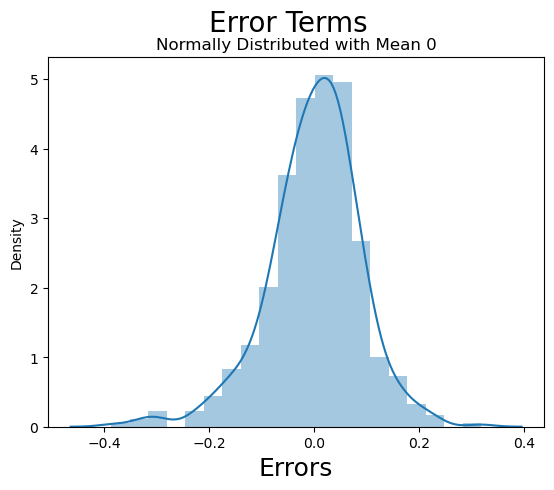

In [328]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)
plt.title('Normally Distributed with Mean 0')

**Spliting X and Y test**

In [329]:
num_vars

['temp', 'humidity', 'windspeed', 'count']

In [330]:
num_vars
bike_exp[num_vars] = scaler.transform(bike_exp[num_vars])
y_test = bike_exp.pop('count')
X_test = bike_exp
X_train_rfe.columns
X_test.columns
X_train_rfe.drop(columns='const', inplace=True)
X_test_mo = X_test[X_train_rfe.columns]
X_test_mo = sm.add_constant(X_test_mo)
y_pred = lr.predict(X_test_mo)

# Model Evaluation

Text(0, 0.5, 'y_pred')

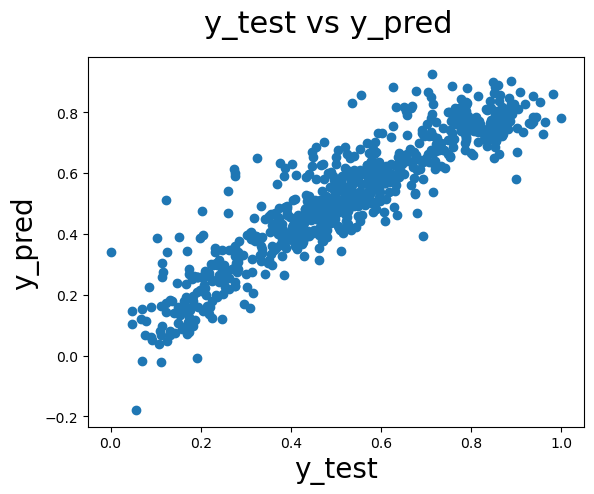

In [331]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=22)              
plt.xlabel('y_test', fontsize=20)                         
plt.ylabel('y_pred', fontsize=20)                        

# Conclusion

## R-Squared for Test Dataset = 83.02%
## R-Squared for Train Dataset = 84.11%
**Therefore we can conclude that the model is best fit**

In [332]:
from sklearn.metrics import r2_score
print(f'R-Squared for Test Dataset = {str(r2_score(y_test, y_pred)*100)[:5]}%')
print(f'R-Squared for Train Dataset = {str(r2_score(y_train, y_train_pred)*100)[:5]}%')

R-Squared for Test Dataset = 83.02%
R-Squared for Train Dataset = 84.11%
